## JWST F770W LMC Flat Region

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 5 Jul 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F770W"
fwhm = 2.2
basename = "jw0104000100"

crval = None
rotation = None

# set to a specific rotation if desired
# rotation = 0.

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
tile1_shifts = [0.10637643165419682, -0.11768223374643519]
tile2_shifts = [0.10700657405766205, -0.13107961726782408]
tile3_shifts = [0.10163923831678442, -0.12152158617752193]
tile4_shifts = [0.09065352553736802, -0.12144904023219313]
tile5_shifts = [-0.975754312382031, 1.0456499145482434]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = False

# display range for uncalibrated images
drange_raw = [15., 35.]
# display range for calibrated images
drange_cal = [4., 20.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
# flatfile = f"RefFiles/DeliveredFlats/MIRI_FM_MIRIMAGE_FASTR1_{filter}_FLAT_09.01.00_kdg_30jun22.fits"
flatfile = None

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.5.4.dev17+geec8bb0d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev1+g51f5dfc


## CALWEBB_DETECTOR1

In [9]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F770W/stage0/jw01040001001_03103_00001_mirimage_uncal.fits', './F770W/stage0/jw01040001001_03103_00002_mirimage_uncal.fits', './F770W/stage0/jw01040001001_03103_00003_mirimage_uncal.fits', './F770W/stage0/jw01040001001_03103_00004_mirimage_uncal.fits', './F770W/stage0/jw01040001001_03103_00005_mirimage_uncal.fits', './F770W/stage0/jw01040001001_0310l_00001_mirimage_uncal.fits', './F770W/stage0/jw01040001001_0310l_00002_mirimage_uncal.fits', './F770W/stage0/jw01040001001_0310l_00003_mirimage_uncal.fits', './F770W/stage0/jw01040001001_0310l_00004_mirimage_uncal.fits', './F770W/stage0/jw01040001001_0310l_00005_mirimage_uncal.fits', './F770W/stage0/jw01040001002_03103_00001_mirimage_uncal.fits', './F770W/stage0/jw01040001002_03103_00002_mirimage_uncal.fits', './F770W/stage0/jw01040001002_03103_00003_mirimage_uncal.fits', './F770W/stage0/jw01040001002_03103_00004_mirimage_uncal.fits', './F770W/stage0/jw01040001002_03103_00005_mirimage_uncal.fits', './F770W/stage0/jw01040001002_0310l_000

In [10]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-07-05 08:42:16,051 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-05 08:42:16,054 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-05 08:42:16,057 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-05 08:42:16,060 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-07-05 08:42:16,064 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-07-05 08:42:16,067 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-07-05 08:42:16,071 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-07-05 08:42:16,073 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-07-05 08:42:16,075 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-07-05 08:42:16,078 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-07-05 0

./F770W/stage0/jw01040001001_03103_00001_mirimage_uncal.fits


2022-07-05 08:42:16,236 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:42:20,037 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:42:20,038 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:42:20,044 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:42:20,162 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001001_03103_00001_mirimage_uncal.fits>,).
2022-07-05 08:42:20,165 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:42:20,215 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:42:31,783 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:42:31,784 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:42:31,785 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:42:31,785 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:42:31,786 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:42:31,787 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:42:31,788 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:42:31,789 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:42:31,791 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:42:31,890 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:42:36,490 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:42:36,764 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:42:36,905 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001001_03103_00001_mirimage_uncal.fits>,).
2022-07-05 08:42:36,908 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:42:36,996 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:42:36,998 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:42:37,008 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001001_03103_00002_mirimage_uncal.fits


2022-07-05 08:42:38,415 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw01040001001_03103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-05 08:42:38,423 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-05 08:42:38,425 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-05 08:42:38,426 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-05 08:42:38,427 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-05 08:42:42,567 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:42:42,621 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-05 08:42:43,163 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-05 08:42:43,294 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 6, 1024, 1032) from jw01040001001_03103_00002_mirimage_uncal.fits>,).
2022-07-05 08:42:43,297 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-05 08:42:49,497 - stpipe.Detector1Pipeline.jump - WARNING - /home/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-05 08:42:49,514 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from five groups.
2022-07-05 08:42:49,516 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2654 pixels with at least one CR from four groups.
2022-07-05 08:42:49,518 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 21 pixels with at least one CR from three groups.
2022-07-05 08:42:50,287 - stpipe.Detector1Pipeline.jump - INFO - Total elapsed time = 1.31233 sec
2022-07-05 08:42:50,296 - stpipe.Detector1Pipeline.jump - INFO - The execution time in seconds: 1.594217
2022-07-05 08:42:50,309 - stpipe.Detector1Pipeline.jump - INFO - Step jump done
2022-07-05 08:42:50,470 - stpipe.Detect

./F770W/stage0/jw01040001001_03103_00003_mirimage_uncal.fits


2022-07-05 08:42:53,890 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:42:55,117 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:42:55,118 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:42:55,124 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:42:55,260 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001001_03103_00003_mirimage_uncal.fits>,).
2022-07-05 08:42:55,263 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:42:55,315 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:43:03,772 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:43:03,773 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:43:03,774 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:43:03,775 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:43:03,775 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:43:03,776 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:43:03,777 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:43:03,778 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:43:03,779 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:43:03,874 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:43:07,632 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:43:07,958 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:43:08,120 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001001_03103_00003_mirimage_uncal.fits>,).
2022-07-05 08:43:08,124 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:43:08,215 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:43:08,216 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:43:08,226 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001001_03103_00004_mirimage_uncal.fits


2022-07-05 08:43:09,054 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:43:10,324 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:43:10,325 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:43:10,332 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:43:10,468 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001001_03103_00004_mirimage_uncal.fits>,).
2022-07-05 08:43:10,471 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:43:10,524 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:43:18,998 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:43:18,999 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:43:19,000 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:43:19,001 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:43:19,002 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:43:19,003 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:43:19,003 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:43:19,004 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:43:19,006 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:43:19,107 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:43:23,091 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:43:23,357 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:43:23,523 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001001_03103_00004_mirimage_uncal.fits>,).
2022-07-05 08:43:23,528 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:43:23,618 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:43:23,620 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:43:23,632 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001001_03103_00005_mirimage_uncal.fits


2022-07-05 08:43:24,476 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:43:25,726 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:43:25,727 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:43:25,733 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:43:25,879 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001001_03103_00005_mirimage_uncal.fits>,).
2022-07-05 08:43:25,882 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:43:25,936 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:43:34,343 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:43:34,344 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:43:34,345 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:43:34,346 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:43:34,347 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:43:34,348 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:43:34,349 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:43:34,351 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:43:34,352 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:43:34,460 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:43:38,609 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:43:38,923 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:43:39,083 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001001_03103_00005_mirimage_uncal.fits>,).
2022-07-05 08:43:39,086 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:43:39,178 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:43:39,179 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:43:39,189 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001001_0310l_00001_mirimage_uncal.fits


2022-07-05 08:43:40,476 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw01040001001_0310l_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-05 08:43:40,483 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-05 08:43:40,484 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-05 08:43:40,486 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-05 08:43:40,487 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-05 08:43:44,676 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:43:44,729 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-05 08:43:45,240 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-05 08:43:45,391 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 6, 1024, 1032) from jw01040001001_0310l_00001_mirimage_uncal.fits>,).
2022-07-05 08:43:45,395 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-05 08:43:51,081 - stpipe.Detector1Pipeline.jump - WARNING - /home/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-05 08:43:51,100 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from five groups.
2022-07-05 08:43:51,102 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2606 pixels with at least one CR from four groups.
2022-07-05 08:43:51,104 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 33 pixels with at least one CR from three groups.
2022-07-05 08:43:51,842 - stpipe.Detector1Pipeline.jump - INFO - Total elapsed time = 1.31979 sec
2022-07-05 08:43:51,851 - stpipe.Detector1Pipeline.jump - INFO - The execution time in seconds: 1.592042
2022-07-05 08:43:51,865 - stpipe.Detector1Pipeline.jump - INFO - Step jump done
2022-07-05 08:43:52,038 - stpipe.Detect

./F770W/stage0/jw01040001001_0310l_00002_mirimage_uncal.fits


2022-07-05 08:43:55,388 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:43:56,607 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:43:56,608 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:43:56,614 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:43:56,767 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001001_0310l_00002_mirimage_uncal.fits>,).
2022-07-05 08:43:56,770 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:43:56,823 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:44:05,381 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:44:05,382 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:44:05,383 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:44:05,383 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:44:05,384 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:44:05,384 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:44:05,385 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:44:05,385 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:44:05,387 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:44:05,480 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:44:09,466 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:44:09,788 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:44:09,950 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001001_0310l_00002_mirimage_uncal.fits>,).
2022-07-05 08:44:09,954 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:44:10,040 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:44:10,041 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:44:10,054 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001001_0310l_00003_mirimage_uncal.fits


2022-07-05 08:44:10,890 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:44:12,156 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:44:12,157 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:44:12,163 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:44:12,310 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001001_0310l_00003_mirimage_uncal.fits>,).
2022-07-05 08:44:12,313 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:44:12,365 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:44:20,825 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:44:20,826 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:44:20,827 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:44:20,828 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:44:20,828 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:44:20,829 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:44:20,830 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:44:20,831 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:44:20,833 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:44:20,931 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:44:25,181 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:44:25,526 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:44:25,701 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001001_0310l_00003_mirimage_uncal.fits>,).
2022-07-05 08:44:25,705 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:44:25,795 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:44:25,796 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:44:25,806 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001001_0310l_00004_mirimage_uncal.fits


2022-07-05 08:44:26,636 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001001_0310l_00004_mirimage_uncal.fits',).
2022-07-05 08:44:26,662 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:44:27,906 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:44:27,907 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:44:27,914 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:44:28,064 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001001_0310l_00004_mirimage_uncal.fits>,).
2022-07-05 08:44:28,067 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:44:28,122 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:44:36,707 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:44:36,708 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:44:36,709 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:44:36,710 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:44:36,710 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:44:36,711 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:44:36,712 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:44:36,713 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:44:36,715 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:44:36,814 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:44:40,850 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:44:41,124 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:44:41,304 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001001_0310l_00004_mirimage_uncal.fits>,).
2022-07-05 08:44:41,308 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:44:41,400 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:44:41,401 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:44:41,411 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001001_0310l_00005_mirimage_uncal.fits


2022-07-05 08:44:42,266 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:44:43,464 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:44:43,465 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:44:43,473 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:44:43,633 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001001_0310l_00005_mirimage_uncal.fits>,).
2022-07-05 08:44:43,636 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:44:43,691 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:44:52,107 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:44:52,108 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:44:52,109 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:44:52,109 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:44:52,110 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:44:52,111 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:44:52,111 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:44:52,112 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:44:52,115 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:44:52,226 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:44:56,760 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:44:57,053 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:44:57,231 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001001_0310l_00005_mirimage_uncal.fits>,).
2022-07-05 08:44:57,234 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:44:57,321 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:44:57,322 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:44:57,333 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001002_03103_00001_mirimage_uncal.fits


2022-07-05 08:44:58,622 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw01040001002_03103_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-05 08:44:58,630 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-05 08:44:58,632 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-05 08:44:58,633 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-05 08:44:58,634 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-05 08:45:02,601 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:45:02,661 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-05 08:45:03,305 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-05 08:45:03,481 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 6, 1024, 1032) from jw01040001002_03103_00001_mirimage_uncal.fits>,).
2022-07-05 08:45:03,486 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-05 08:45:09,376 - stpipe.Detector1Pipeline.jump - WARNING - /home/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-05 08:45:09,394 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from five groups.
2022-07-05 08:45:09,396 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2544 pixels with at least one CR from four groups.
2022-07-05 08:45:09,398 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 20 pixels with at least one CR from three groups.
2022-07-05 08:45:10,084 - stpipe.Detector1Pipeline.jump - INFO - Total elapsed time = 1.29966 sec
2022-07-05 08:45:10,093 - stpipe.Detector1Pipeline.jump - INFO - The execution time in seconds: 1.570512
2022-07-05 08:45:10,106 - stpipe.Detector1Pipeline.jump - INFO - Step jump done
2022-07-05 08:45:10,290 - stpipe.Detect

./F770W/stage0/jw01040001002_03103_00002_mirimage_uncal.fits


2022-07-05 08:45:14,040 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw01040001002_03103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-05 08:45:14,048 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-05 08:45:14,050 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-05 08:45:14,050 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-05 08:45:14,052 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-05 08:45:18,174 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:45:18,228 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-05 08:45:18,717 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-05 08:45:18,874 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 6, 1024, 1032) from jw01040001002_03103_00002_mirimage_uncal.fits>,).
2022-07-05 08:45:18,877 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-05 08:45:24,601 - stpipe.Detector1Pipeline.jump - WARNING - /home/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-05 08:45:24,617 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from five groups.
2022-07-05 08:45:24,620 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2608 pixels with at least one CR from four groups.
2022-07-05 08:45:24,621 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from three groups.
2022-07-05 08:45:25,303 - stpipe.Detector1Pipeline.jump - INFO - Total elapsed time = 1.33396 sec
2022-07-05 08:45:25,312 - stpipe.Detector1Pipeline.jump - INFO - The execution time in seconds: 1.603520
2022-07-05 08:45:25,324 - stpipe.Detector1Pipeline.jump - INFO - Step jump done
2022-07-05 08:45:25,519 - stpipe.Detect

./F770W/stage0/jw01040001002_03103_00003_mirimage_uncal.fits


2022-07-05 08:45:28,823 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:45:30,028 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:45:30,029 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:45:30,034 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:45:30,190 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001002_03103_00003_mirimage_uncal.fits>,).
2022-07-05 08:45:30,194 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:45:30,246 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:45:38,673 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:45:38,674 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:45:38,675 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:45:38,676 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:45:38,676 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:45:38,677 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:45:38,678 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:45:38,679 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:45:38,681 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:45:38,774 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:45:42,686 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:45:42,984 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:45:43,160 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001002_03103_00003_mirimage_uncal.fits>,).
2022-07-05 08:45:43,164 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:45:43,254 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:45:43,255 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:45:43,266 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001002_03103_00004_mirimage_uncal.fits


2022-07-05 08:45:44,109 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:45:45,316 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:45:45,317 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:45:45,322 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:45:45,484 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001002_03103_00004_mirimage_uncal.fits>,).
2022-07-05 08:45:45,487 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:45:45,540 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:45:53,928 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:45:53,929 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:45:53,929 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:45:53,930 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:45:53,931 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:45:53,932 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:45:53,932 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:45:53,933 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:45:53,934 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:45:54,027 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:45:57,930 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:45:58,251 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:45:58,440 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001002_03103_00004_mirimage_uncal.fits>,).
2022-07-05 08:45:58,443 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:45:58,534 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:45:58,535 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:45:58,549 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001002_03103_00005_mirimage_uncal.fits


2022-07-05 08:45:59,386 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001002_03103_00005_mirimage_uncal.fits',).
2022-07-05 08:45:59,409 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:46:00,612 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:46:00,613 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:46:00,618 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:46:00,780 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001002_03103_00005_mirimage_uncal.fits>,).
2022-07-05 08:46:00,783 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:46:00,835 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:46:09,327 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:46:09,328 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:46:09,329 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:46:09,329 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:46:09,330 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:46:09,331 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:46:09,331 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:46:09,332 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:46:09,333 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:46:09,426 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:46:13,421 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:46:13,745 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:46:13,950 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001002_03103_00005_mirimage_uncal.fits>,).
2022-07-05 08:46:13,954 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:46:14,046 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:46:14,047 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:46:14,057 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001002_0310l_00001_mirimage_uncal.fits


2022-07-05 08:46:15,358 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw01040001002_0310l_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-05 08:46:15,366 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-05 08:46:15,367 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-05 08:46:15,368 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-05 08:46:15,369 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-05 08:46:19,592 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:46:19,645 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-05 08:46:20,135 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-05 08:46:20,303 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 6, 1024, 1032) from jw01040001002_0310l_00001_mirimage_uncal.fits>,).
2022-07-05 08:46:20,307 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-05 08:46:26,096 - stpipe.Detector1Pipeline.jump - WARNING - /home/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-05 08:46:26,109 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from five groups.
2022-07-05 08:46:26,110 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2922 pixels with at least one CR from four groups.
2022-07-05 08:46:26,112 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 31 pixels with at least one CR from three groups.
2022-07-05 08:46:26,867 - stpipe.Detector1Pipeline.jump - INFO - Total elapsed time = 1.35362 sec
2022-07-05 08:46:26,876 - stpipe.Detector1Pipeline.jump - INFO - The execution time in seconds: 1.631099
2022-07-05 08:46:26,889 - stpipe.Detector1Pipeline.jump - INFO - Step jump done
2022-07-05 08:46:27,084 - stpipe.Detect

./F770W/stage0/jw01040001002_0310l_00002_mirimage_uncal.fits


2022-07-05 08:46:30,463 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:46:31,688 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:46:31,689 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:46:31,695 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:46:31,860 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001002_0310l_00002_mirimage_uncal.fits>,).
2022-07-05 08:46:31,863 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:46:31,916 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:46:40,373 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:46:40,374 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:46:40,375 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:46:40,375 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:46:40,376 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:46:40,376 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:46:40,377 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:46:40,378 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:46:40,380 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:46:40,473 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:46:44,420 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:46:44,743 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:46:44,939 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001002_0310l_00002_mirimage_uncal.fits>,).
2022-07-05 08:46:44,943 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:46:45,030 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:46:45,031 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:46:45,042 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001002_0310l_00003_mirimage_uncal.fits


2022-07-05 08:46:45,895 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:46:47,099 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:46:47,100 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:46:47,108 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:46:47,276 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001002_0310l_00003_mirimage_uncal.fits>,).
2022-07-05 08:46:47,279 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:46:47,336 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:46:55,793 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:46:55,794 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:46:55,795 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:46:55,796 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:46:55,797 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:46:55,798 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:46:55,798 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:46:55,799 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:46:55,801 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:46:55,900 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:46:59,824 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:47:00,134 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:47:00,327 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001002_0310l_00003_mirimage_uncal.fits>,).
2022-07-05 08:47:00,331 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:47:00,420 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:47:00,420 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:47:00,431 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001002_0310l_00004_mirimage_uncal.fits


2022-07-05 08:47:01,265 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001002_0310l_00004_mirimage_uncal.fits',).
2022-07-05 08:47:01,291 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:47:02,515 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:47:02,516 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:47:02,521 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:47:02,696 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001002_0310l_00004_mirimage_uncal.fits>,).
2022-07-05 08:47:02,699 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:47:02,756 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:47:11,346 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:47:11,347 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:47:11,347 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:47:11,348 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:47:11,349 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:47:11,349 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:47:11,350 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:47:11,350 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:47:11,352 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:47:11,451 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:47:15,496 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:47:15,837 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:47:16,033 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001002_0310l_00004_mirimage_uncal.fits>,).
2022-07-05 08:47:16,036 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:47:16,124 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:47:16,125 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:47:16,135 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001002_0310l_00005_mirimage_uncal.fits


2022-07-05 08:47:16,988 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001002_0310l_00005_mirimage_uncal.fits',).
2022-07-05 08:47:17,010 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:47:18,207 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:47:18,208 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:47:18,213 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:47:18,380 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001002_0310l_00005_mirimage_uncal.fits>,).
2022-07-05 08:47:18,384 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:47:18,436 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:47:26,967 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:47:26,968 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:47:26,969 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:47:26,970 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:47:26,970 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:47:26,971 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:47:26,972 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:47:26,973 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:47:26,974 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:47:27,076 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:47:31,161 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:47:31,451 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:47:31,648 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001002_0310l_00005_mirimage_uncal.fits>,).
2022-07-05 08:47:31,652 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:47:31,743 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:47:31,744 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:47:31,754 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001003_03103_00001_mirimage_uncal.fits


2022-07-05 08:47:32,628 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001003_03103_00001_mirimage_uncal.fits',).
2022-07-05 08:47:32,655 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:47:33,864 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:47:33,865 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:47:33,870 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:47:34,048 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001003_03103_00001_mirimage_uncal.fits>,).
2022-07-05 08:47:34,051 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:47:34,104 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:47:42,620 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:47:42,621 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:47:42,622 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:47:42,623 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:47:42,624 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:47:42,624 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:47:42,625 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:47:42,625 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:47:42,627 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:47:42,721 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:47:46,802 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:47:47,128 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:47:47,335 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001003_03103_00001_mirimage_uncal.fits>,).
2022-07-05 08:47:47,338 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:47:47,434 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:47:47,435 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:47:47,446 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001003_03103_00002_mirimage_uncal.fits


2022-07-05 08:47:48,319 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:47:49,517 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:47:49,518 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:47:49,523 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:47:49,694 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001003_03103_00002_mirimage_uncal.fits>,).
2022-07-05 08:47:49,698 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:47:49,750 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:47:58,395 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:47:58,396 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:47:58,396 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:47:58,397 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:47:58,398 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:47:58,398 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:47:58,399 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:47:58,400 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:47:58,402 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:47:58,497 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:48:02,490 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:48:02,805 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:48:03,004 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001003_03103_00002_mirimage_uncal.fits>,).
2022-07-05 08:48:03,008 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:48:03,097 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:48:03,098 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:48:03,107 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001003_03103_00003_mirimage_uncal.fits


2022-07-05 08:48:03,970 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001003_03103_00003_mirimage_uncal.fits',).
2022-07-05 08:48:03,995 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:48:05,222 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:48:05,224 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:48:05,229 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:48:05,401 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001003_03103_00003_mirimage_uncal.fits>,).
2022-07-05 08:48:05,404 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:48:05,458 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:48:14,176 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:48:14,177 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:48:14,177 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:48:14,178 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:48:14,179 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:48:14,179 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:48:14,180 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:48:14,181 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:48:14,182 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:48:14,279 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:48:18,398 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:48:18,719 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:48:18,919 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001003_03103_00003_mirimage_uncal.fits>,).
2022-07-05 08:48:18,923 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:48:19,013 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:48:19,014 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:48:19,024 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001003_03103_00004_mirimage_uncal.fits


2022-07-05 08:48:19,906 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001003_03103_00004_mirimage_uncal.fits',).
2022-07-05 08:48:19,930 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:48:21,128 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:48:21,130 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:48:21,136 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:48:21,312 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001003_03103_00004_mirimage_uncal.fits>,).
2022-07-05 08:48:21,315 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:48:21,371 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:48:29,929 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:48:29,930 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:48:29,930 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:48:29,931 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:48:29,932 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:48:29,933 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:48:29,933 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:48:29,934 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:48:29,936 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:48:30,031 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:48:34,099 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:48:34,407 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:48:34,611 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001003_03103_00004_mirimage_uncal.fits>,).
2022-07-05 08:48:34,615 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:48:34,707 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:48:34,708 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:48:34,718 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001003_03103_00005_mirimage_uncal.fits


2022-07-05 08:48:35,587 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:48:36,805 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:48:36,806 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:48:36,812 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:48:36,987 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001003_03103_00005_mirimage_uncal.fits>,).
2022-07-05 08:48:36,991 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:48:37,044 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:48:45,686 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:48:45,687 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:48:45,688 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:48:45,688 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:48:45,689 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:48:45,690 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:48:45,691 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:48:45,692 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:48:45,693 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:48:45,788 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:48:49,918 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:48:50,245 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:48:50,450 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001003_03103_00005_mirimage_uncal.fits>,).
2022-07-05 08:48:50,453 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:48:50,543 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:48:50,544 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:48:50,554 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001003_0310l_00001_mirimage_uncal.fits


2022-07-05 08:48:51,428 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:48:52,652 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:48:52,653 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:48:52,658 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:48:52,836 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001003_0310l_00001_mirimage_uncal.fits>,).
2022-07-05 08:48:52,839 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:48:52,892 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:49:01,390 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:49:01,391 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:49:01,392 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:49:01,393 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:49:01,393 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:49:01,394 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:49:01,394 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:49:01,395 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:49:01,396 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:49:01,489 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:49:05,640 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:49:05,972 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:49:06,176 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001003_0310l_00001_mirimage_uncal.fits>,).
2022-07-05 08:49:06,181 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:49:06,269 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:49:06,270 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:49:06,281 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001003_0310l_00002_mirimage_uncal.fits


2022-07-05 08:49:07,150 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001003_0310l_00002_mirimage_uncal.fits',).
2022-07-05 08:49:07,174 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:49:08,379 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:49:08,380 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:49:08,385 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:49:08,563 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001003_0310l_00002_mirimage_uncal.fits>,).
2022-07-05 08:49:08,567 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:49:08,621 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:49:17,243 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:49:17,244 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:49:17,244 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:49:17,245 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:49:17,245 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:49:17,247 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:49:17,248 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:49:17,248 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:49:17,250 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:49:17,348 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:49:21,431 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:49:21,785 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:49:21,994 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001003_0310l_00002_mirimage_uncal.fits>,).
2022-07-05 08:49:21,997 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:49:22,091 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:49:22,092 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:49:22,102 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001003_0310l_00003_mirimage_uncal.fits


2022-07-05 08:49:22,991 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:49:24,203 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:49:24,204 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:49:24,211 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:49:24,398 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001003_0310l_00003_mirimage_uncal.fits>,).
2022-07-05 08:49:24,402 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:49:24,458 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:49:33,048 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:49:33,049 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:49:33,050 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:49:33,050 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:49:33,051 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:49:33,052 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:49:33,052 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:49:33,053 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:49:33,055 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:49:33,146 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:49:37,292 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:49:37,592 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:49:37,801 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001003_0310l_00003_mirimage_uncal.fits>,).
2022-07-05 08:49:37,805 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:49:37,903 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:49:37,904 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:49:37,914 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001003_0310l_00004_mirimage_uncal.fits


2022-07-05 08:49:38,841 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:49:40,075 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:49:40,076 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:49:40,081 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:49:40,258 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001003_0310l_00004_mirimage_uncal.fits>,).
2022-07-05 08:49:40,262 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:49:40,316 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:49:48,898 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:49:48,899 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:49:48,900 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:49:48,901 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:49:48,902 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:49:48,902 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:49:48,903 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:49:48,904 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:49:48,907 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:49:48,997 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:49:53,067 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:49:53,380 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:49:53,590 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001003_0310l_00004_mirimage_uncal.fits>,).
2022-07-05 08:49:53,594 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:49:53,683 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:49:53,684 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:49:53,694 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001003_0310l_00005_mirimage_uncal.fits


2022-07-05 08:49:54,546 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001003_0310l_00005_mirimage_uncal.fits',).
2022-07-05 08:49:54,572 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:49:55,790 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:49:55,791 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:49:55,796 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:49:55,974 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001003_0310l_00005_mirimage_uncal.fits>,).
2022-07-05 08:49:55,977 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:49:56,031 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:50:04,707 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:50:04,708 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:50:04,709 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:50:04,710 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:50:04,711 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:50:04,711 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:50:04,712 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:50:04,713 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:50:04,714 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:50:04,808 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:50:08,891 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:50:09,239 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:50:09,457 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001003_0310l_00005_mirimage_uncal.fits>,).
2022-07-05 08:50:09,460 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:50:09,551 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:50:09,552 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:50:09,563 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001004_03103_00001_mirimage_uncal.fits


2022-07-05 08:50:10,460 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001004_03103_00001_mirimage_uncal.fits',).
2022-07-05 08:50:10,486 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:50:11,685 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:50:11,685 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:50:11,691 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:50:11,877 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001004_03103_00001_mirimage_uncal.fits>,).
2022-07-05 08:50:11,880 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:50:11,934 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:50:20,694 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:50:20,695 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:50:20,696 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:50:20,697 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:50:20,697 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:50:20,699 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:50:20,700 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:50:20,700 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:50:20,702 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:50:20,795 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:50:24,982 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:50:25,308 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:50:25,528 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001004_03103_00001_mirimage_uncal.fits>,).
2022-07-05 08:50:25,532 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:50:25,621 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:50:25,622 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:50:25,634 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001004_03103_00002_mirimage_uncal.fits


2022-07-05 08:50:26,494 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001004_03103_00002_mirimage_uncal.fits',).
2022-07-05 08:50:26,522 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:50:27,743 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:50:27,744 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:50:27,749 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:50:27,938 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001004_03103_00002_mirimage_uncal.fits>,).
2022-07-05 08:50:27,941 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:50:27,995 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:50:37,090 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:50:37,091 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:50:37,092 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:50:37,092 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:50:37,093 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:50:37,094 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:50:37,095 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:50:37,095 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:50:37,097 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:50:37,190 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:50:41,407 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:50:41,776 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:50:41,996 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001004_03103_00002_mirimage_uncal.fits>,).
2022-07-05 08:50:42,000 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:50:42,092 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:50:42,093 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:50:42,103 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001004_03103_00003_mirimage_uncal.fits


2022-07-05 08:50:42,985 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001004_03103_00003_mirimage_uncal.fits',).
2022-07-05 08:50:43,010 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:50:44,233 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:50:44,234 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:50:44,239 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:50:44,429 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001004_03103_00003_mirimage_uncal.fits>,).
2022-07-05 08:50:44,432 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:50:44,485 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:50:53,686 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:50:53,687 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:50:53,687 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:50:53,689 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:50:53,689 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:50:53,690 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:50:53,691 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:50:53,692 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:50:53,693 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:50:53,783 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:50:57,972 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:50:58,319 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:50:58,535 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001004_03103_00003_mirimage_uncal.fits>,).
2022-07-05 08:50:58,538 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:50:58,631 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:50:58,632 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:50:58,642 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001004_03103_00004_mirimage_uncal.fits


2022-07-05 08:50:59,533 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001004_03103_00004_mirimage_uncal.fits',).
2022-07-05 08:50:59,559 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:51:00,768 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:51:00,769 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:51:00,774 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:51:00,966 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001004_03103_00004_mirimage_uncal.fits>,).
2022-07-05 08:51:00,969 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:51:01,022 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:51:10,281 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:51:10,282 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:51:10,283 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:51:10,284 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:51:10,284 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:51:10,285 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:51:10,286 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:51:10,286 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:51:10,288 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:51:10,380 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:51:14,580 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:51:14,906 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:51:15,114 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001004_03103_00004_mirimage_uncal.fits>,).
2022-07-05 08:51:15,118 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:51:15,209 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:51:15,210 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:51:15,220 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001004_03103_00005_mirimage_uncal.fits


2022-07-05 08:51:16,105 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001004_03103_00005_mirimage_uncal.fits',).
2022-07-05 08:51:16,130 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:51:17,360 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:51:17,361 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:51:17,367 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:51:17,563 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001004_03103_00005_mirimage_uncal.fits>,).
2022-07-05 08:51:17,566 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:51:17,620 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:51:26,855 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:51:26,856 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:51:26,857 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:51:26,857 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:51:26,858 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:51:26,858 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:51:26,859 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:51:26,860 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:51:26,861 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:51:26,957 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:51:31,074 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:51:31,436 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:51:31,661 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001004_03103_00005_mirimage_uncal.fits>,).
2022-07-05 08:51:31,665 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:51:31,757 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:51:31,758 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:51:31,768 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001004_0310l_00001_mirimage_uncal.fits


2022-07-05 08:51:32,683 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:51:33,914 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:51:33,915 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:51:33,922 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:51:34,119 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001004_0310l_00001_mirimage_uncal.fits>,).
2022-07-05 08:51:34,122 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:51:34,177 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:51:43,390 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:51:43,391 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:51:43,392 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:51:43,392 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:51:43,393 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:51:43,394 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:51:43,394 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:51:43,395 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:51:43,397 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:51:43,493 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:51:47,672 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:51:48,004 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:51:48,216 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001004_0310l_00001_mirimage_uncal.fits>,).
2022-07-05 08:51:48,222 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:51:48,313 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:51:48,314 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:51:48,327 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001004_0310l_00002_mirimage_uncal.fits


2022-07-05 08:51:49,233 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001004_0310l_00002_mirimage_uncal.fits',).
2022-07-05 08:51:49,256 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:51:50,472 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:51:50,472 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:51:50,478 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:51:50,674 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001004_0310l_00002_mirimage_uncal.fits>,).
2022-07-05 08:51:50,677 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:51:50,732 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:51:59,981 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:51:59,982 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:51:59,982 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:51:59,983 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:51:59,984 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:51:59,985 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:51:59,986 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:51:59,986 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:51:59,988 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:52:00,082 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:52:04,374 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:52:04,714 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:52:04,939 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001004_0310l_00002_mirimage_uncal.fits>,).
2022-07-05 08:52:04,942 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:52:05,032 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:52:05,033 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:52:05,044 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001004_0310l_00003_mirimage_uncal.fits


2022-07-05 08:52:05,945 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001004_0310l_00003_mirimage_uncal.fits',).
2022-07-05 08:52:05,970 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:52:07,190 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:52:07,191 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:52:07,196 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:52:07,389 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001004_0310l_00003_mirimage_uncal.fits>,).
2022-07-05 08:52:07,393 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:52:07,449 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:52:16,917 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:52:16,918 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:52:16,919 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:52:16,919 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:52:16,920 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:52:16,921 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:52:16,921 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:52:16,922 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:52:16,924 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:52:17,016 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:52:21,175 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:52:21,530 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:52:21,753 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001004_0310l_00003_mirimage_uncal.fits>,).
2022-07-05 08:52:21,757 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:52:21,849 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:52:21,850 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:52:21,860 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001004_0310l_00004_mirimage_uncal.fits


2022-07-05 08:52:22,785 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:52:23,999 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:52:24,000 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:52:24,006 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:52:24,196 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001004_0310l_00004_mirimage_uncal.fits>,).
2022-07-05 08:52:24,199 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:52:24,253 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:52:33,670 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:52:33,671 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:52:33,671 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:52:33,672 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:52:33,673 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:52:33,674 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:52:33,674 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:52:33,675 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:52:33,677 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:52:33,770 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:52:38,082 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:52:38,402 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:52:38,625 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001004_0310l_00004_mirimage_uncal.fits>,).
2022-07-05 08:52:38,630 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:52:38,720 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:52:38,721 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:52:38,730 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001004_0310l_00005_mirimage_uncal.fits


2022-07-05 08:52:39,644 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001004_0310l_00005_mirimage_uncal.fits',).
2022-07-05 08:52:39,668 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:52:40,911 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:52:40,912 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:52:40,918 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:52:41,112 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001004_0310l_00005_mirimage_uncal.fits>,).
2022-07-05 08:52:41,115 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:52:41,171 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:52:50,610 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:52:50,611 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:52:50,612 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:52:50,612 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:52:50,613 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:52:50,613 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:52:50,614 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:52:50,615 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:52:50,617 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:52:50,709 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:52:55,019 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:52:55,398 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:52:55,624 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001004_0310l_00005_mirimage_uncal.fits>,).
2022-07-05 08:52:55,628 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:52:55,724 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:52:55,726 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:52:55,736 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001005_03103_00001_mirimage_uncal.fits


2022-07-05 08:52:56,670 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:52:57,923 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:52:57,924 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:52:57,930 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:52:58,130 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001005_03103_00001_mirimage_uncal.fits>,).
2022-07-05 08:52:58,134 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:52:58,190 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:53:07,763 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:53:07,764 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:53:07,764 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:53:07,765 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:53:07,766 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:53:07,766 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:53:07,767 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:53:07,767 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:53:07,770 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:53:07,863 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:53:12,115 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:53:12,475 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:53:12,706 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001005_03103_00001_mirimage_uncal.fits>,).
2022-07-05 08:53:12,709 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:53:12,798 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:53:12,799 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:53:12,810 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001005_03103_00002_mirimage_uncal.fits


2022-07-05 08:53:13,722 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001005_03103_00002_mirimage_uncal.fits',).
2022-07-05 08:53:13,748 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:53:14,972 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:53:14,973 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:53:14,979 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:53:15,154 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001005_03103_00002_mirimage_uncal.fits>,).
2022-07-05 08:53:15,157 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:53:15,211 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:53:24,601 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:53:24,602 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:53:24,603 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:53:24,603 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:53:24,604 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:53:24,605 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:53:24,606 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:53:24,607 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:53:24,609 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:53:24,699 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:53:29,052 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:53:29,416 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:53:29,645 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001005_03103_00002_mirimage_uncal.fits>,).
2022-07-05 08:53:29,649 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:53:29,740 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:53:29,741 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:53:29,750 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001005_03103_00003_mirimage_uncal.fits


2022-07-05 08:53:30,692 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-05 08:53:31,938 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:53:31,939 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:53:31,946 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:53:32,144 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001005_03103_00003_mirimage_uncal.fits>,).
2022-07-05 08:53:32,149 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:53:32,204 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:53:41,797 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:53:41,798 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:53:41,799 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:53:41,800 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:53:41,801 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:53:41,801 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:53:41,802 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:53:41,803 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:53:41,804 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:53:41,897 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:53:46,275 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:53:46,611 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:53:46,841 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001005_03103_00003_mirimage_uncal.fits>,).
2022-07-05 08:53:46,846 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:53:46,942 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:53:46,943 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:53:46,955 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001005_03103_00004_mirimage_uncal.fits


2022-07-05 08:53:47,882 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001005_03103_00004_mirimage_uncal.fits',).
2022-07-05 08:53:47,909 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:53:49,129 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:53:49,130 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:53:49,137 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:53:49,342 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001005_03103_00004_mirimage_uncal.fits>,).
2022-07-05 08:53:49,346 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:53:49,400 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:53:58,902 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:53:58,903 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:53:58,904 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:53:58,905 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:53:58,905 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:53:58,906 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:53:58,906 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:53:58,907 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:53:58,910 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:53:59,002 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:54:03,296 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:54:03,666 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:54:03,899 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001005_03103_00004_mirimage_uncal.fits>,).
2022-07-05 08:54:03,903 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:54:03,992 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:54:03,993 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:54:04,003 - stpipe.Detector1Pipeline

./F770W/stage0/jw01040001005_03103_00005_mirimage_uncal.fits


2022-07-05 08:54:04,935 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F770W/stage0/jw01040001005_03103_00005_mirimage_uncal.fits',).
2022-07-05 08:54:04,962 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2022-07-05 08:54:06,227 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-05 08:54:06,229 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-05 08:54:06,236 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-05 08:54:06,418 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 1024, 1032) from jw01040001005_03103_00005_mirimage_uncal.fits>,).
2022-07-05 08:54:06,421 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:54:06,474 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri/

2022-07-05 08:54:15,959 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-05 08:54:15,960 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-05 08:54:15,961 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-05 08:54:15,961 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-05 08:54:15,962 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-05 08:54:15,963 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-05 08:54:15,963 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-05 08:54:15,964 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-05 08:54:15,965 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-05 08:54:16,059 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-05 08:54:20,469 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-05 08:54:20,797 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-05 08:54:21,031 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw01040001005_03103_00005_mirimage_uncal.fits>,).
2022-07-05 08:54:21,035 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-05 08:54:21,126 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-05 08:54:21,127 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-05 08:54:21,137 - stpipe.Detector1Pipeline

In [11]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [12]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

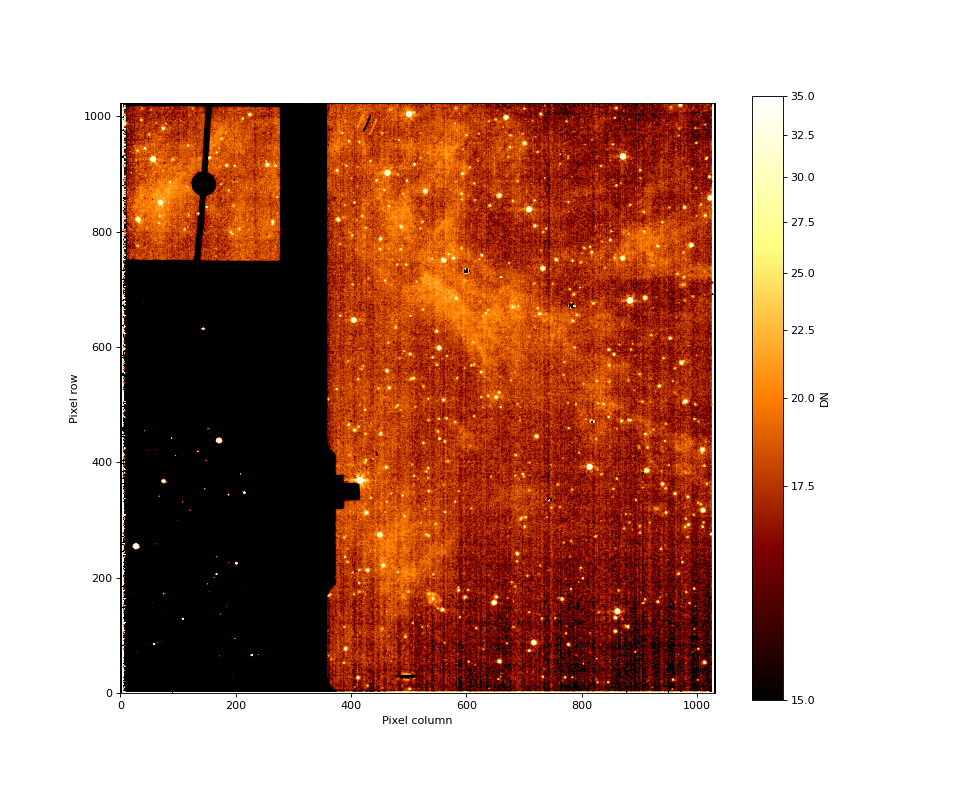

In [13]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

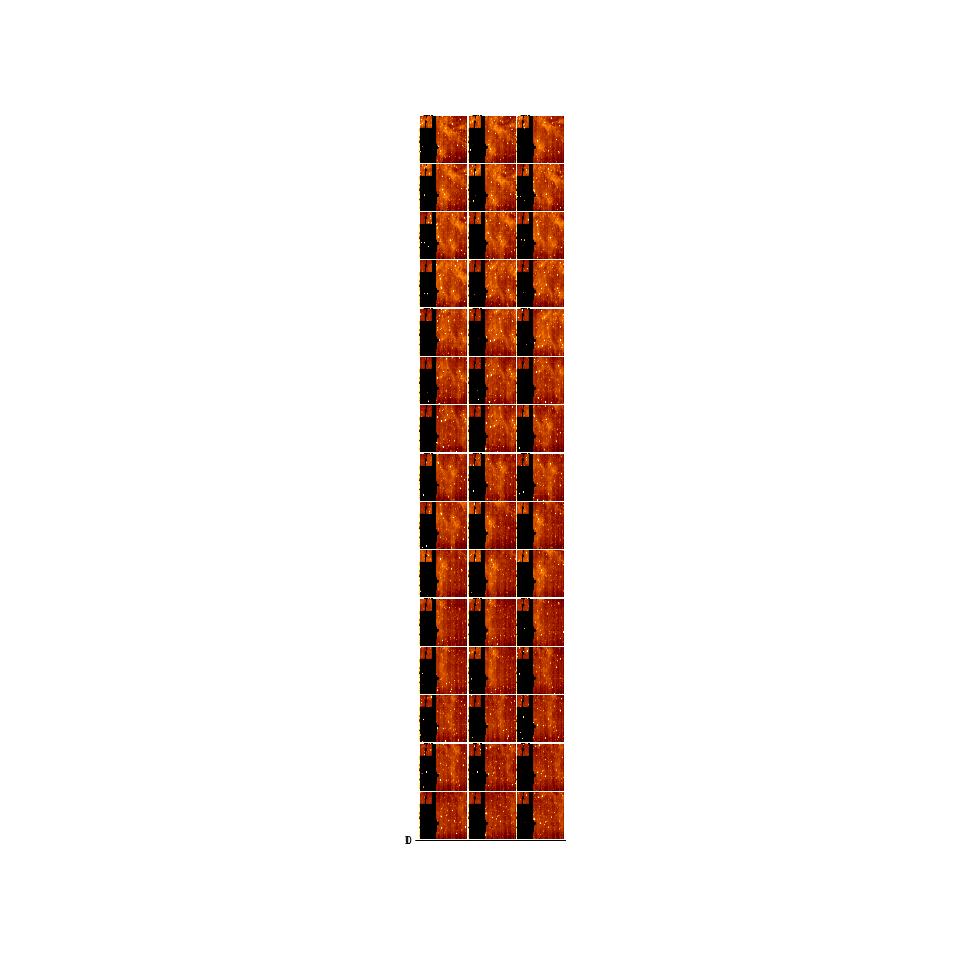

In [14]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [15]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F770W/stage1/jw01040001001_03103_00001_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_03103_00002_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_03103_00003_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_03103_00004_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_03103_00005_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_0310l_00001_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_0310l_00002_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_0310l_00003_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_0310l_00004_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_0310l_00005_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001002_03103_00001_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001002_03103_00002_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001002_03103_00003_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001002_03103_00004_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001002_031

In [16]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-07-05 08:55:01,745 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-07-05 08:55:01,748 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-07-05 08:55:01,751 - stpipe.Image2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2022-07-05 08:55:01,754 - stpipe.Image2Pipeline.flat_field - INFO - FlatFieldStep instance created.
2022-07-05 08:55:01,757 - stpipe.Image2Pipeline.photom - INFO - PhotomStep instance created.
2022-07-05 08:55:01,759 - stpipe.Image2Pipeline.resample - INFO - ResampleStep instance created.
2022-07-05 08:55:02,172 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline running with args (['./F770W/stage1/jw01040001001_03103_00001_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_03103_00002_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_03103_00003_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_03103_00004_mirimage_fixed_rate.fits', './F770W/stage1/jw01040001001_03103_00005_mi

2022-07-05 08:55:06,186 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-05 08:55:06,187 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-05 08:55:06,187 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-05 08:55:06,188 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-05 08:55:06,189 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-05 08:55:06,190 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-05 08:55:06,191 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-05 08:55:06,191 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-05 08:55:06,192 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-

2022-07-05 08:55:06,249 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-05 08:55:06,249 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-05 08:55:06,250 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-05 08:55:06,251 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-05 08:55:06,252 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-05 08:55:06,252 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-05 08:55:06,253 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0

2022-07-05 08:55:06,305 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-05 08:55:06,305 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-05 08:55:06,306 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-05 08:55:06,307 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-05 08:55:06,307 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-05 08:55:06,308 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw01040001001_0310l_00002_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-05 08:55:06,315 - stpipe.Image2Pipeline - INFO - Prefetch fo

2022-07-05 08:55:06,379 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-05 08:55:06,380 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-05 08:55:06,381 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-05 08:55:06,382 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-05 08:55:06,382 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-05 08:55:06,383 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-05 08:55:06,383 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-05 08:55:06,384 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-05 08:55:06,384 - stpipe.Image2

2022-07-05 08:55:06,457 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw01040001002_03103_00002_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-05 08:55:06,469 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-05 08:55:06,470 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-05 08:55:06,471 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-05 08:55:06,472 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-05 08:55:06,473 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-

2022-07-05 08:55:06,526 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-05 08:55:06,527 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-05 08:55:06,527 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-05 08:55:06,529 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-05 08:55:06,529 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-05 08:55:06,530 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-05 08:55:06,531 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-05 08:55:06,531 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-05 08:55:06,532 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-05 08:55:

2022-07-05 08:55:06,601 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-05 08:55:06,601 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-05 08:55:06,602 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-05 08:55:06,603 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-05 08:55:06,603 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-05 08:55:06,604 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-05 08:55:06,605 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-05 08:55:06,606 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/refe

2022-07-05 08:55:06,660 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-05 08:55:06,660 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-05 08:55:06,661 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-05 08:55:06,662 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-05 08:55:06,662 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-05 08:55:06,663 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-05 08:55:06,664 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-05 08:55:06,665 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw01040001002_0310l_00005_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disp

2022-07-05 08:55:06,730 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-05 08:55:06,731 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-05 08:55:06,732 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-05 08:55:06,732 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-05 08:55:06,733 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-05 08:55:06,734 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-05 08:55:06,734 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-05 08:55:06,734 - stpipe.Image2Pipeline - INFO - Prefetch for IF

2022-07-05 08:55:06,805 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-05 08:55:06,805 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-05 08:55:06,807 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw01040001003_03103_00005_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-05 08:55:06,814 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-05 08:55:06,815 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-05 08:55:06,816 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.


2022-07-05 08:55:06,889 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-05 08:55:06,890 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-05 08:55:06,891 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-05 08:55:06,891 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-05 08:55:06,892 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-05 08:55:06,893 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-05 08:55:06,893 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-05 08:55:06,894 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-05 08:55:06,895 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-07-05 08:55:06,972 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-05 08:55:06,973 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-05 08:55:06,974 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-05 08:55:06,975 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-05 08:55:06,975 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-05 08:55:06,976 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-05 08:55:06,977 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-05 08:55:06,978 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-05 08:55:07,047 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-05 08:55:07,047 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-05 08:55:07,048 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-05 08:55:07,049 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-05 08:55:07,050 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-05 08:55:07,050 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-05 08:55:07,051 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-05 08:55:07,051 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-05 08:55:07,053 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw010400010

2022-07-05 08:55:07,119 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-05 08:55:07,120 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-05 08:55:07,121 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-05 08:55:07,122 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-05 08:55:07,124 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-05 08:55:07,125 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-05 08:55:07,126 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-07-05 08:55:07,184 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-05 08:55:07,184 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-05 08:55:07,185 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-05 08:55:07,187 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw01040001004_0310l_00003_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-05 08:55:07,199 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-05 08:55:07,200 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
202

2022-07-05 08:55:07,257 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-05 08:55:07,258 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-05 08:55:07,258 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-05 08:55:07,259 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-05 08:55:07,260 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-05 08:55:07,260 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-05 08:55:07,261 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-05 08:55:07,261 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-05 08:55:07,262 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-07-05 08:55:07,319 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-05 08:55:07,320 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-05 08:55:07,321 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-05 08:55:07,322 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-05 08:55:07,322 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-05 08:55:07,323 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-05 08:55:07,324 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-05 08:55:07,325 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-05 08:55:07,376 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-05 08:55:07,377 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-05 08:55:07,377 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-05 08:55:07,379 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-05 08:55:07,380 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-05 08:55:07,380 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-05 08:55:07,381 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-05 08:55:07,381 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-05 08:55:07,384 - stpipe.Image2Pipeline - INFO - Starting calwebb_image2 ...
2022-07-05 08:55:07,399 -

2022-07-05 08:55:16,567 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-05 08:55:16,568 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw01040001001_03103_00001_mirimage_fixed
2022-07-05 08:55:16,572 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw01040001001_03103_00002_mirimage_fixed
2022-07-05 08:55:16,573 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw01040001001_03103_00002_mirimage_fixed_rate.fits ...
2022-07-05 08:55:17,066 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw01040001001_03103_00002_mirimage_fixed_rate.fits>,).
2022-07-05 08:55:17,070 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wc

2022-07-05 08:55:26,107 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2022-07-05 08:55:26,530 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa'

2022-07-05 08:55:35,709 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  80.563059974 -69.457138485 80.581961294 -69.487709200 80.669576622 -69.481067396 80.651333663 -69.450394969
2022-07-05 08:55:35,710 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  80.563059974 -69.457138485 80.581961294 -69.487709200 80.669576622 -69.481067396 80.651333663 -69.450394969
2022-07-05 08:55:35,710 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-05 08:55:35,852 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-05 08:55:36,256 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw01040001001_03103_00004_mirimage_fixed_rate.fits>,).
2022-07-05 08:55:36,260 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'outp

2022-07-05 08:55:45,283 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat': None, 'inverse': False}
2022-07-05 08:55:45,505 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:55:45,506 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:55:45,507 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:55:45,519 - stpipe.Image2Pipeline.flat_field - WARNING - K

2022-07-05 08:55:54,616 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:55:54,629 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:55:54,856 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-05 08:55:55,247 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw01040001001_0310l_00001_mirimage_fixed_rate.fits>,).
2022-07-05 08:55:55,250 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-05 08:55:55

2022-07-05 08:56:04,413 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-05 08:56:04,414 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-05 08:56:04,564 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-05 08:56:04,565 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-05 08:56:04,566 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-05 08:56:04,567 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-05 08:56:04,666 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-05 08:56:04,671 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-05 08:56:04,672 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-05 08:56:04,673 - stpipe.Image2P

2022-07-05 08:56:13,743 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-05 08:56:13,745 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-05 08:56:13,746 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-05 08:56:13,782 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-05 08:56:14,225 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw01040001001_0310l_00003_mirimage_fixed_rate.fits>,).
2022-07-05 08:56:14,231 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None,

2022-07-05 08:56:23,430 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-05 08:56:23,713 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-05 08:56:24,363 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:56:25,017 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-05 08:56:25,645 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:56:26,300 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-05 08:56:26,921 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:56:27,579 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-05 08:56:28,210 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:56:28,901 - stpipe.Image2Pipeline.resample 

2022-07-05 08:56:36,814 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-05 08:56:37,438 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:56:38,123 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  80.546297247 -69.462026549 80.564955772 -69.492733243 80.653437441 -69.486100647 80.634658149 -69.455403439
2022-07-05 08:56:38,367 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F770W/stage2/jw01040001001_0310l_00005_mirimage_fixed_i2d.fits
2022-07-05 08:56:38,368 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-05 08:56:38,369 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw01040001001_0310l_00005_mirimage_fixed
2022-07-05 08:56:38,372 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw01040001002_03103_00001_mirimage_fixed
2022-07-05 08:56:38,372 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw010400

2022-07-05 08:56:47,573 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw01040001002_03103_00002_mirimage_fixed
2022-07-05 08:56:47,573 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw01040001002_03103_00002_mirimage_fixed_rate.fits ...
2022-07-05 08:56:48,085 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw01040001002_03103_00002_mirimage_fixed_rate.fits>,).
2022-07-05 08:56:48,089 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 

2022-07-05 08:56:57,682 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-05 08:56:57,834 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  80.528964503 -69.458965750 80.547819484 -69.489540106 80.635452744 -69.482915196 80.617256284 -69.452239256
2022-07-05 08:56:57,835 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  80.528964503 -69.458965750 80.547819484 -69.489540106 80.635452744 -69.482915196 80.617256284 -69.452239256
2022-07-05 08:56:57,835 - stpipe.Image2

2022-07-05 08:57:06,911 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  80.525185945 -69.459887482 80.544036425 -69.490462240 80.631674610 -69.483839201 80.613482687 -69.453162872
2022-07-05 08:57:06,912 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-05 08:57:07,056 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-05 08:57:07,504 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw01040001002_03103_00004_mirimage_fixed_rate.fits>,).
2022-07-05 08:57:07,508 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-07-05 08:57:16,808 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:57:16,809 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:57:16,810 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:57:16,822 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:57:17,054 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-05 08:57:17,503 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw01040001002_03103_00005_mirimage_fixed_rate.fits>,).
2022-07-05 08:57:17,507 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-05 08:57:26,647 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw01040001002_0310l_00001_mirimage_fixed_rate.fits>,).
2022-07-05 08:57:26,651 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-05 08:57:26,715 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-05 08:57:26,717 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-05 08:57:26,874 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-05 08:57:26

2022-07-05 08:57:35,896 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-05 08:57:36,043 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-05 08:57:36,044 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-05 08:57:36,045 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-05 08:57:36,045 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-05 08:57:36,135 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-05 08:57:36,139 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-05 08:57:36,140 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-05 08:57:36,141 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-05 08:57:36,175 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-05 08:57:36,622 - stpipe.Ima

2022-07-05 08:57:45,391 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-05 08:57:45,426 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-05 08:57:45,908 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw01040001002_0310l_00003_mirimage_fixed_rate.fits>,).
2022-07-05 08:57:45,913 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-05 08:57:45,980 - stpipe.Image2P

2022-07-05 08:57:55,259 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-05 08:57:55,541 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-05 08:57:56,178 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:57:56,812 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-05 08:57:57,444 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:57:58,116 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-05 08:57:58,786 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:57:59,489 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-05 08:58:00,137 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:58:00,950 - stpipe.Image2Pipeline.resample 

2022-07-05 08:58:08,985 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-05 08:58:09,645 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:58:10,416 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  80.521451013 -69.453372731 80.540067171 -69.484082025 80.628520703 -69.477461787 80.609783839 -69.446761957
2022-07-05 08:58:10,661 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F770W/stage2/jw01040001002_0310l_00005_mirimage_fixed_i2d.fits
2022-07-05 08:58:10,662 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-05 08:58:10,663 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw01040001002_0310l_00005_mirimage_fixed
2022-07-05 08:58:10,665 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw01040001003_03103_00001_mirimage_fixed
2022-07-05 08:58:10,666 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw010400

2022-07-05 08:58:20,821 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw01040001003_03103_00002_mirimage_fixed
2022-07-05 08:58:20,822 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw01040001003_03103_00002_mirimage_fixed_rate.fits ...
2022-07-05 08:58:21,308 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw01040001003_03103_00002_mirimage_fixed_rate.fits>,).
2022-07-05 08:58:21,312 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 

2022-07-05 08:58:31,889 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-05 08:58:32,040 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  80.541989487 -69.447564929 80.560853118 -69.478137868 80.648435738 -69.471506394 80.630230307 -69.440831815
2022-07-05 08:58:32,041 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  80.541989487 -69.447564929 80.560853118 -69.478137868 80.648435738 -69.471506394 80.630230307 -69.440831815
2022-07-05 08:58:32,042 - stpipe.Image2

2022-07-05 08:58:41,429 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  80.538215154 -69.448487104 80.557074296 -69.479060445 80.644661837 -69.472430838 80.626460930 -69.441755872
2022-07-05 08:58:41,430 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-05 08:58:41,567 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-05 08:58:42,025 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw01040001003_03103_00004_mirimage_fixed_rate.fits>,).
2022-07-05 08:58:42,028 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-07-05 08:58:52,423 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:58:52,425 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:58:52,425 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:58:52,439 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 08:58:52,691 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-05 08:58:53,148 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw01040001003_03103_00005_mirimage_fixed_rate.fits>,).
2022-07-05 08:58:53,152 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-05 08:59:03,496 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw01040001003_0310l_00001_mirimage_fixed_rate.fits>,).
2022-07-05 08:59:03,500 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-05 08:59:03,566 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-05 08:59:03,567 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-05 08:59:03,742 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-05 08:59:03

2022-07-05 08:59:14,137 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-05 08:59:14,312 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-05 08:59:14,313 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-05 08:59:14,314 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-05 08:59:14,315 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-05 08:59:14,419 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-05 08:59:14,423 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-05 08:59:14,425 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-05 08:59:14,426 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-05 08:59:14,469 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-05 08:59:14,959 - stpipe.Ima

2022-07-05 08:59:24,903 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-05 08:59:24,946 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-05 08:59:25,413 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw01040001003_0310l_00003_mirimage_fixed_rate.fits>,).
2022-07-05 08:59:25,418 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-05 08:59:25,486 - stpipe.Image2P

2022-07-05 08:59:35,606 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-05 08:59:35,939 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-05 08:59:36,667 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:59:37,361 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-05 08:59:38,073 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:59:38,789 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-05 08:59:39,508 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:59:40,217 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-05 08:59:40,979 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:59:41,730 - stpipe.Image2Pipeline.resample 

2022-07-05 08:59:50,400 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-05 08:59:51,114 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 08:59:51,875 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  80.559314864 -69.450622262 80.577983334 -69.481327470 80.666413641 -69.474687853 80.647624566 -69.443992135
2022-07-05 08:59:52,146 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F770W/stage2/jw01040001003_0310l_00005_mirimage_fixed_i2d.fits
2022-07-05 08:59:52,147 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-05 08:59:52,148 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw01040001003_0310l_00005_mirimage_fixed
2022-07-05 08:59:52,151 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw01040001004_03103_00001_mirimage_fixed
2022-07-05 08:59:52,152 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw010400

2022-07-05 09:00:02,353 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw01040001004_03103_00002_mirimage_fixed
2022-07-05 09:00:02,354 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw01040001004_03103_00002_mirimage_fixed_rate.fits ...
2022-07-05 09:00:02,945 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw01040001004_03103_00002_mirimage_fixed_rate.fits>,).
2022-07-05 09:00:02,949 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 

2022-07-05 09:00:13,634 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-05 09:00:13,805 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  80.554998768 -69.436163274 80.573870791 -69.466734812 80.661402875 -69.460096861 80.643188730 -69.429423628
2022-07-05 09:00:13,806 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  80.554998768 -69.436163274 80.573870791 -69.466734812 80.661402875 -69.460096861 80.643188730 -69.429423628
2022-07-05 09:00:13,807 - stpipe.Image2

2022-07-05 09:00:23,984 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  80.551225428 -69.437085490 80.570093151 -69.467657417 80.657630112 -69.461021267 80.639420301 -69.430347660
2022-07-05 09:00:23,984 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-05 09:00:24,148 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-05 09:00:24,553 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw01040001004_03103_00004_mirimage_fixed_rate.fits>,).
2022-07-05 09:00:24,556 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-07-05 09:00:34,924 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 09:00:34,925 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 09:00:34,926 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 09:00:34,939 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 09:00:35,197 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-05 09:00:35,678 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw01040001004_03103_00005_mirimage_fixed_rate.fits>,).
2022-07-05 09:00:35,682 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-05 09:00:45,781 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw01040001004_0310l_00001_mirimage_fixed_rate.fits>,).
2022-07-05 09:00:45,786 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-05 09:00:45,848 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-05 09:00:45,850 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-05 09:00:46,017 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-05 09:00:46

2022-07-05 09:00:55,864 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-05 09:00:56,032 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-05 09:00:56,033 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-05 09:00:56,034 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-05 09:00:56,035 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-05 09:00:56,137 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-05 09:00:56,142 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-05 09:00:56,143 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-05 09:00:56,145 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-05 09:00:56,185 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-05 09:00:56,677 - stpipe.Ima

2022-07-05 09:01:06,345 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-05 09:01:06,384 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-05 09:01:06,888 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw01040001004_0310l_00003_mirimage_fixed_rate.fits>,).
2022-07-05 09:01:06,895 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-05 09:01:06,963 - stpipe.Image2P

2022-07-05 09:01:17,280 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-05 09:01:17,575 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-05 09:01:18,292 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 09:01:19,002 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-05 09:01:19,724 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 09:01:20,428 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-05 09:01:21,157 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 09:01:21,855 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-05 09:01:22,575 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 09:01:23,335 - stpipe.Image2Pipeline.resample 

2022-07-05 09:01:32,080 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-05 09:01:32,799 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-05 09:01:33,553 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  80.534476676 -69.441972733 80.553101653 -69.472680630 80.641504137 -69.466053777 80.622758614 -69.435355348
2022-07-05 09:01:33,825 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F770W/stage2/jw01040001004_0310l_00005_mirimage_fixed_i2d.fits
2022-07-05 09:01:33,826 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-05 09:01:33,827 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw01040001004_0310l_00005_mirimage_fixed
2022-07-05 09:01:33,830 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw01040001005_03103_00001_mirimage_fixed
2022-07-05 09:01:33,831 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw010400

2022-07-05 09:01:44,044 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw01040001005_03103_00002_mirimage_fixed
2022-07-05 09:01:44,045 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw01040001005_03103_00002_mirimage_fixed_rate.fits ...
2022-07-05 09:01:44,700 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw01040001005_03103_00002_mirimage_fixed_rate.fits>,).
2022-07-05 09:01:44,704 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 

2022-07-05 09:01:55,514 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-05 09:01:55,683 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  80.517161228 -69.438911033 80.535982342 -69.469486621 80.623537261 -69.462867474 80.605374221 -69.432190334
2022-07-05 09:01:55,684 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  80.517161228 -69.438911033 80.535982342 -69.469486621 80.623537261 -69.462867474 80.605374221 -69.432190334
2022-07-05 09:01:55,685 - stpipe.Image2

2022-07-05 09:02:05,944 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  80.513386843 -69.439832766 80.532203333 -69.470408766 80.619763196 -69.463791534 80.601604814 -69.433113997
2022-07-05 09:02:05,945 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-05 09:02:06,108 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-05 09:02:06,630 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw01040001005_03103_00004_mirimage_fixed_rate.fits>,).
2022-07-05 09:02:06,635 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-07-05 09:02:17,273 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 09:02:17,274 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 09:02:17,275 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 09:02:17,290 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-05 09:02:17,556 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-05 09:02:18,099 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw01040001005_03103_00005_mirimage_fixed_rate.fits>,).
2022-07-05 09:02:18,102 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-05 09:02:25,632 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0913.pmap
2022-07-05 09:02:25,633 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0913.pmap
2022-07-05 09:02:25,634 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0913.pmap
2022-07-05 09:02:25,635 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0913.pmap
2022-07-05 09:02:25,636 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0913.pmap
2022-07-05 09:02:25,637 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0913.pmap
2022-07-05 09:02:25,638 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0913.pmap
2022-07-05 09:02:25,639 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0913.pmap
2022-07-05 09:02:25,639 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0913.pmap
2022-07-05 09:02:25,640 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0913.pmap
2022-07-05

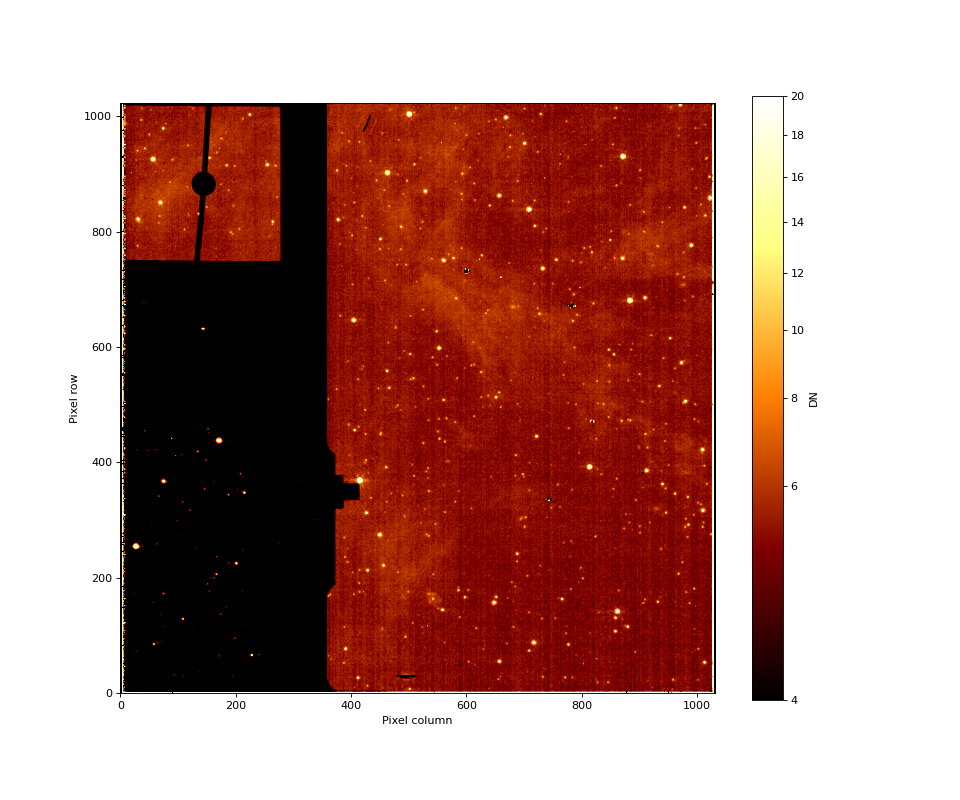

In [17]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

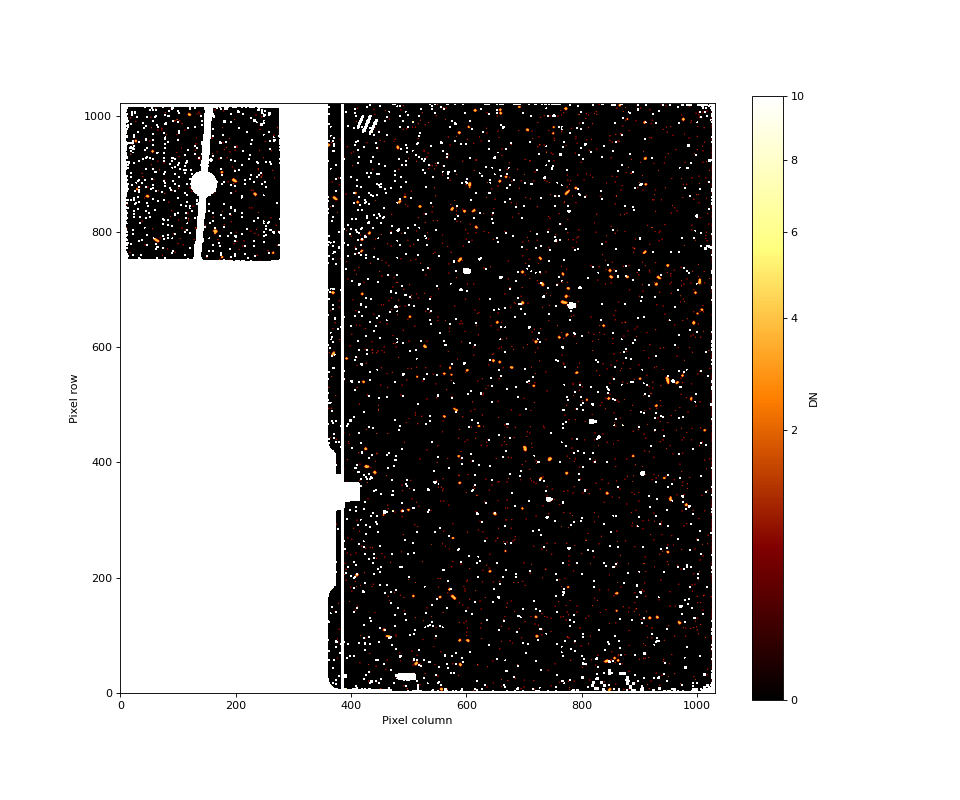

In [18]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

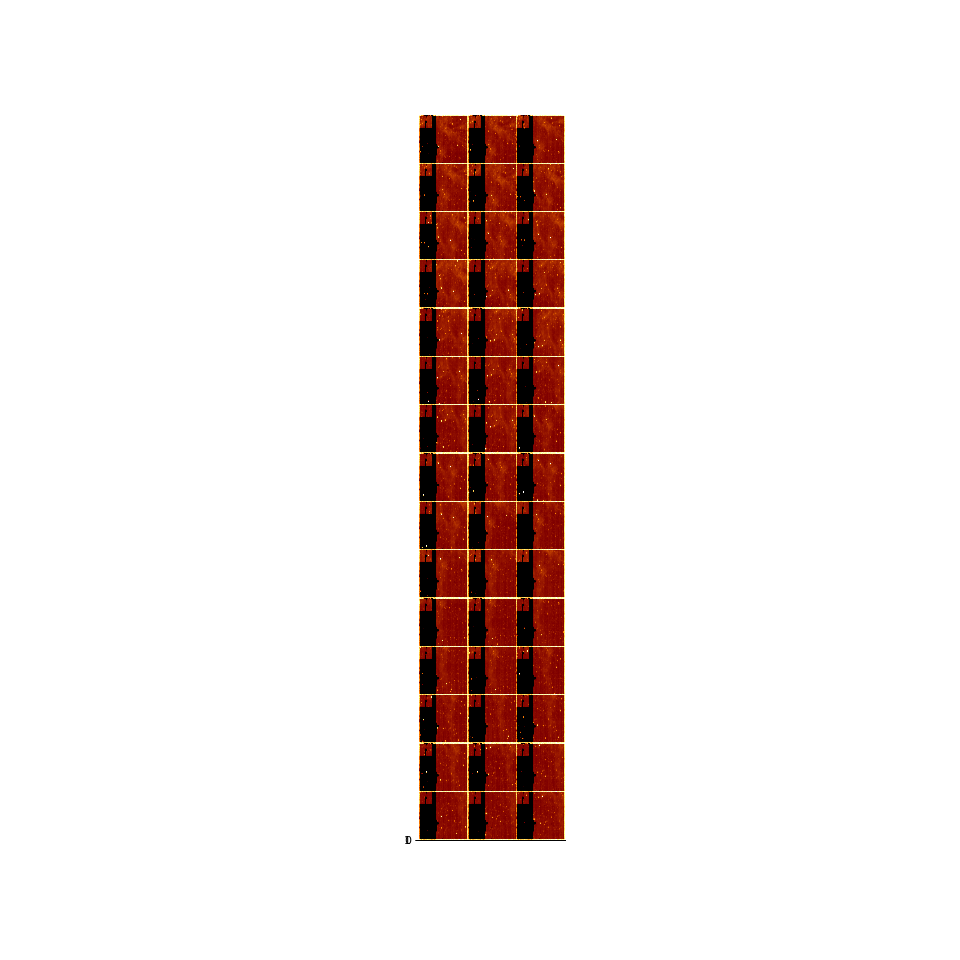

In [19]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [20]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}1*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)
    
# update the WCS for mosaic tile 3
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}3*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile3_shifts)
    
# update the WCS for mosaic tile 4
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}4*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile4_shifts)
    
# update the WCS for mosaic tile 5
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}5*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile5_shifts)

In [21]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F770W/stage2/jw01040001001_03103_00001_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001001_03103_00002_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001001_03103_00003_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001001_03103_00004_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001001_03103_00005_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001001_0310l_00001_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001001_0310l_00002_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001001_0310l_00003_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001001_0310l_00004_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001001_0310l_00005_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001002_03103_00001_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001002_03103_00002_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001002_03103_00003_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw01040001002_03103_00004_mirimage_fixed_wcs_ca

In [22]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-05 09:03:59,035 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-05 09:03:59,038 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-05 09:03:59,042 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep instance created.
2022-07-05 09:03:59,045 - stpipe.Image3Pipeline.skymatch - INFO - SkyMatchStep instance created.
2022-07-05 09:03:59,051 - stpipe.Image3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.
2022-07-05 09:03:59,056 - stpipe.Image3Pipeline.resample - INFO - ResampleStep instance created.
2022-07-05 09:03:59,059 - stpipe.Image3Pipeline.source_catalog - INFO - SourceCatalogStep instance created.
2022-07-05 09:03:59,690 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline running with args ('miri_F770W_stage3_asn.json',).
2022-07-05 09:03:59,708 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': '

2022-07-05 09:04:32,231 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1839, 1563)
2022-07-05 09:04:34,250 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1839, 1563)
2022-07-05 09:04:36,422 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1839, 1563)
2022-07-05 09:04:38,732 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1839, 1563)
2022-07-05 09:04:41,269 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1839, 1563)
2022-07-05 09:04:43,135 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1839, 1563)
2022-07-05 09:04:44,936 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1839, 1563)
2022-07-05 09:04:46,800 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1839, 1563)
2022-07-05 09:04:48,664 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizz

2022-07-05 09:07:12,937 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1839, 1563)
2022-07-05 09:07:14,793 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1839, 1563)
2022-07-05 09:07:16,831 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1839, 1563)
2022-07-05 09:07:18,825 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1839, 1563)
2022-07-05 09:07:20,701 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1839, 1563)
2022-07-05 09:07:22,629 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1839, 1563)
2022-07-05 09:07:24,662 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1839, 1563)
2022-07-05 09:07:26,581 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1839, 1563)
2022-07-05 09:07:28,645 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (102

2022-07-05 09:08:00,151 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw01040001001_0310l_00001_mirimage_fixed_wcs_a3001_crf.fits
2022-07-05 09:08:00,808 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw01040001001_0310l_00002_mirimage_fixed_wcs_a3001_crf.fits
2022-07-05 09:08:01,389 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw01040001001_0310l_00003_mirimage_fixed_wcs_a3001_crf.fits
2022-07-05 09:08:02,041 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw01040001001_0310l_00004_mirimage_fixed_wcs_a3001_crf.fits
2022-07-05 09:08:02,737 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw01040001001_0310l_00005_mirimage_fixed_wcs_a3001_crf.fits
2022-07-05 09:08:03,304 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw01040001002_03103_00001_mirimage_fixed_wcs_a3001_crf.fits
2022-07-05

2022-07-05 09:08:36,382 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:08:37,955 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:08:39,526 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:08:41,089 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:08:42,679 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:08:44,241 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:08:45,876 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:08:47,442 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:08:49,007 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:08:50,576 - stpipe.Image3Pipelin

2022-07-05 09:10:37,309 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:10:38,869 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:10:40,432 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:10:42,005 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:10:43,561 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:10:45,147 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:10:46,701 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:10:48,256 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:10:49,811 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:10:50,508 - stpipe.Image3Pipelin

2022-07-05 09:12:36,648 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:12:38,211 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:12:39,773 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:12:41,330 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:12:42,888 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:12:44,452 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:12:46,024 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:12:47,588 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:12:49,153 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1855, 1576)
2022-07-05 09:12:50,699 - stpipe.Image3Pipelin

In [23]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [24]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

In [25]:
# Read in the source catalog
miri_source_cat = ascii.read(miri_catalog_file)

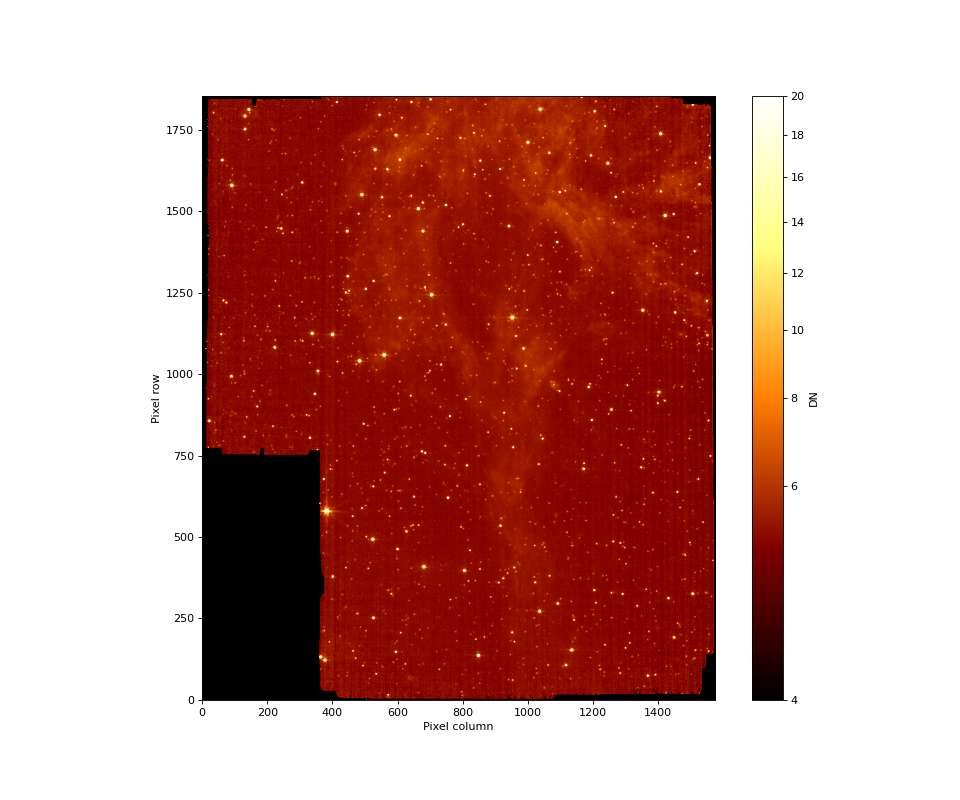

In [26]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

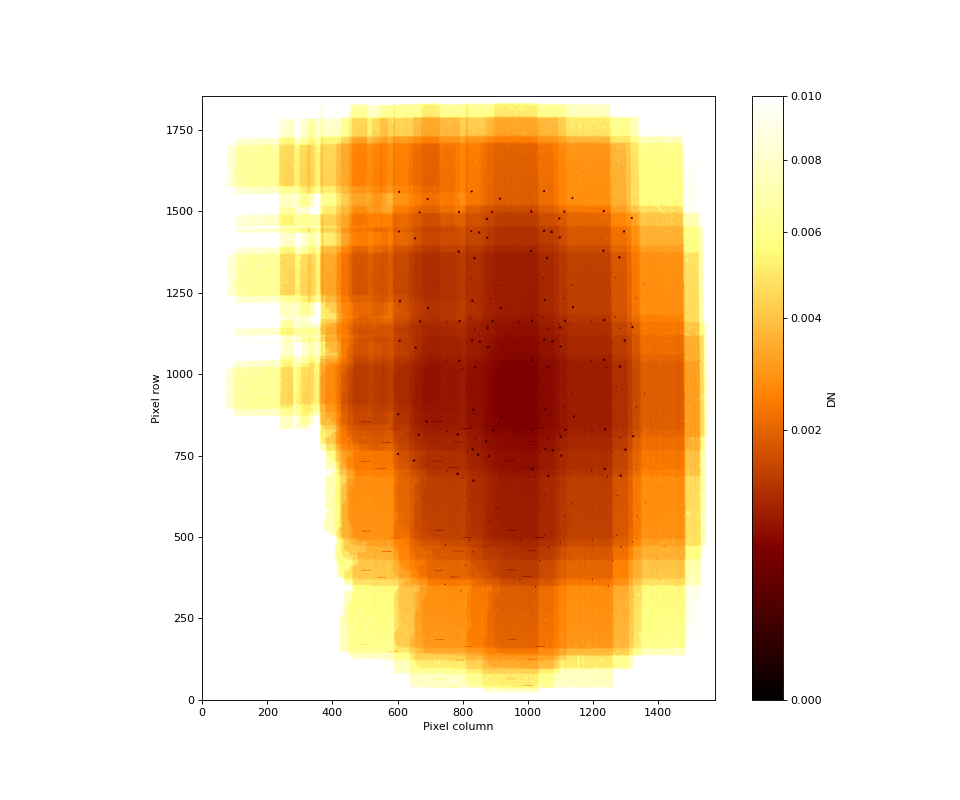

In [27]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

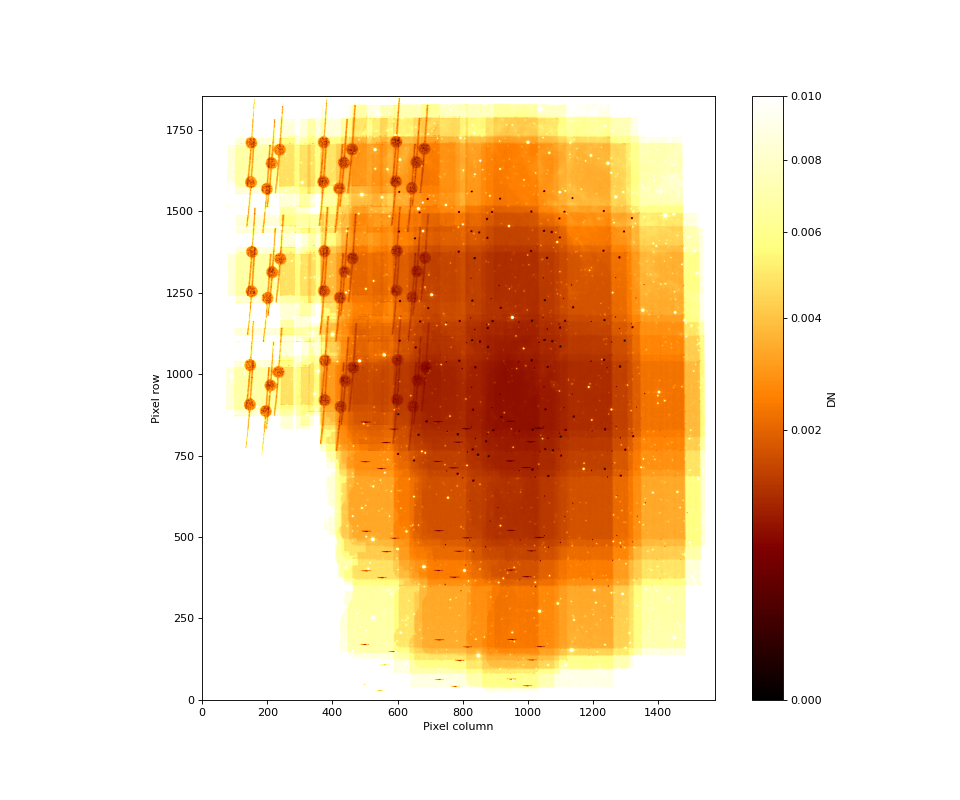

In [28]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

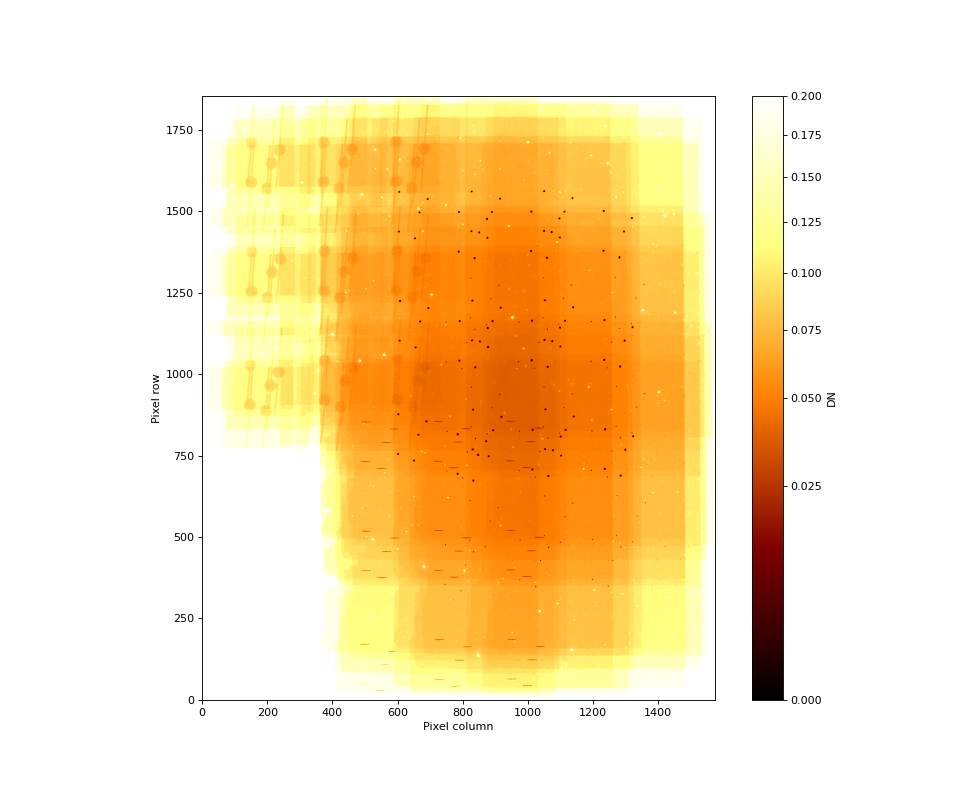

In [29]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

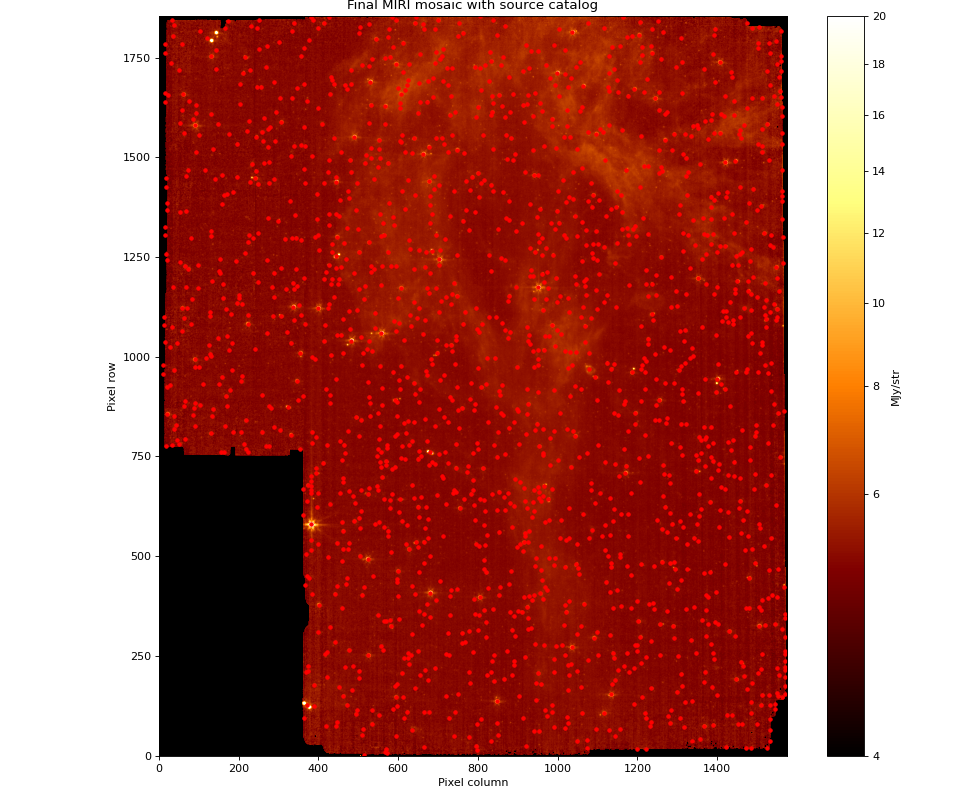

In [30]:
# Show the catalog sources on the mosaic
overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                title='Final MIRI mosaic with source catalog', dmap=dmap)